In [1]:
#pip install fastf1

In [2]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [3]:
pwd

'/Users/rohanpinto/Desktop/Udemy data science/Cache'

In [4]:
# 1. Enable the cache
ff1.Cache.enable_cache('../cache') 

In [5]:
# 2. Setup plotting
plotting.setup_mpl()

In [6]:
# 3.Load the data and get the laps
F1 = ff1.get_session(2021, 'Abu Dhabi', 'Q')

In [8]:
laps = F1.load_laps(with_telemetry=True)

Loading laps for Abu Dhabi Grand Prix - Qualifying [v2.1.13]
Using cached data for timing_data
Using cached data for timing_app_data
Processing timing data...
Using cached data for driver_info
Using cached data for session_status_data
Using cached data for track_status_data
Using cached data for car_data
Using cached data for position_data
Using cached data for weather_data
Loaded data for 20 drivers: ['11', '16', '3', '18', '7', '31', '63', '44', '47', '6', '55', '10', '99', '5', '4', '22', '77', '9', '14', '33']


In [9]:
F1laps = laps
F1laps.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:19:51.500000,44,NaT,1,1,0 days 00:18:03.961000,NaT,NaT,0 days 00:00:46.679000,0 days 00:00:39.069000,...,223.0,SOFT,1.0,True,0 days 00:18:03.961000,Mercedes,HAM,1,False,2021-12-11 13:03:04.145
1,0 days 00:21:14.766000,44,0 days 00:01:23.266000,2,1,NaT,NaT,0 days 00:00:17.071000,0 days 00:00:36.030000,0 days 00:00:30.165000,...,319.0,SOFT,2.0,True,0 days 00:19:51.500000,Mercedes,HAM,1,True,2021-12-11 13:04:51.684
2,0 days 00:23:08.473000,44,0 days 00:01:53.707000,3,2,NaT,0 days 00:23:07.394000,0 days 00:00:26.719000,0 days 00:00:46.209000,0 days 00:00:40.779000,...,226.0,SOFT,1.0,True,0 days 00:21:14.766000,Mercedes,HAM,1,False,2021-12-11 13:06:14.950
3,0 days 00:33:38.317000,44,NaT,4,2,0 days 00:31:41.450000,NaT,NaT,0 days 00:00:46.828000,0 days 00:00:44.612000,...,224.0,SOFT,5.0,False,0 days 00:23:08.473000,Mercedes,HAM,5,False,2021-12-11 13:08:08.657
4,0 days 00:35:01.162000,44,0 days 00:01:22.845000,5,2,NaT,NaT,0 days 00:00:16.975000,0 days 00:00:35.788000,0 days 00:00:30.082000,...,320.0,SOFT,6.0,False,0 days 00:33:38.317000,Mercedes,HAM,1,True,2021-12-11 13:18:38.501


In [10]:
#4. Study the data to get an understanding of it
F1laps.Driver.unique()

array(['HAM', 'VER', 'BOT', 'PER', 'NOR', 'TSU', 'GAS', 'SAI', 'RIC',
       'LEC', 'STR', 'OCO', 'RAI', 'GIO', 'ALO', 'VET', 'RUS', 'LAT',
       'MSC', 'MAZ'], dtype=object)

In [11]:
F1laps.describe()

,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,LapStartTime
count,328,222,328.000000,328.000000,94,92,235,309,304,235,309,304,325.000000,309.000000,236.000000,324.000000,314.000000,328
mean,0 days 00:44:15.864762195,0 days 00:01:39.494923423,9.582317,3.173780,0 days 00:41:46.827425531,0 days 00:47:17.130576086,0 days 00:00:20.082812765,0 days 00:00:43.561935275,0 days 00:00:42.080032894,0 days 00:42:46.839863829,0 days 00:43:48.965708737,0 days 00:44:48.528654605,252.793846,254.883495,219.021186,268.327160,2.719745,0 days 00:41:21.457286585
std,0 days 00:19:20.023348100,0 days 00:00:17.736579707,5.868012,1.737423,0 days 00:19:43.042296967,0 days 00:18:43.649454716,0 days 00:00:03.817663301,0 days 00:00:06.965262059,0 days 00:00:11.780099,0 days 00:19:23.044821040,0 days 00:19:31.546999076,0 days 00:19:33.290211271,38.727809,54.382060,21.099046,51.687958,1.571855,0 days 00:19:11.538420587
min,0 days 00:16:45.743000,0 days 00:01:22.109000,1.000000,1.000000,0 days 00:15:03.118000,0 days 00:20:06.195000,0 days 00:00:16.834000,0 days 00:00:35.643000,0 days 00:00:29.613000,0 days 00:17:02.932000,0 days 00:16:11.087000,0 days 00:16:45.963000,95.000000,93.000000,54.000000,109.000000,1.000000,0 days 00:15:03.118000
25%,0 days 00:25:18.539500,0 days 00:01:23.754250,5.000000,2.000000,0 days 00:25:47.024250,0 days 00:27:48.736750,0 days 00:00:17.184000,0 days 00:00:36.340000,0 days 00:00:30.815500,0 days 00:23:58.864000,0 days 00:24:38.391000,0 days 00:24:58.452000,237.000000,217.000000,221.000000,231.750000,1.000000,0 days 00:23:19.586250
50%,0 days 00:44:53.739000,0 days 00:01:36.216500,9.000000,3.000000,0 days 00:43:10.256000,0 days 00:49:23.304000,0 days 00:00:18.805000,0 days 00:00:43.489000,0 days 00:00:40.949000,0 days 00:36:39.892000,0 days 00:44:20.790000,0 days 00:45:19.441500,259.000000,250.000000,223.000000,273.000000,2.000000,0 days 00:36:35.223000
75%,0 days 00:58:34.610250,0 days 00:01:51.515500,14.000000,4.000000,0 days 00:54:39.336750,0 days 01:00:31.109250,0 days 00:00:22.178000,0 days 00:00:46.762000,0 days 00:00:46.088750,0 days 00:57:47.800500,0 days 00:58:20.690000,0 days 00:59:00.115500,287.000000,316.000000,225.000000,320.000000,4.000000,0 days 00:57:09.899500
max,0 days 01:20:46.369000,0 days 00:02:29.314000,24.000000,7.000000,0 days 01:14:50.865000,0 days 01:20:46.369000,0 days 00:00:44.630000,0 days 00:01:12.133000,0 days 00:01:34.613000,0 days 01:20:46.369000,0 days 01:19:45.179000,0 days 01:20:28.827000,297.000000,324.000000,231.000000,328.000000,9.000000,0 days 01:19:32.495000


In [12]:
F1laps.columns

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Compound', 'TyreLife',
       'FreshTyre', 'LapStartTime', 'Team', 'Driver', 'TrackStatus',
       'IsAccurate', 'LapStartDate'],
      dtype='object')

In [13]:
#max speed 
maxs = F1laps.SpeedST.nlargest(3)
maxs

36    328.0
26    327.0
73    327.0
dtype: float64

In [14]:
#top 5 highest clocked speeds
filt_speed = F1laps.SpeedST >= 319
max_speed = F1laps.loc[filt_speed,['Time','LapNumber', 'LapTime','Team', 'Driver','SpeedST','Compound', 'TyreLife','FreshTyre','TrackStatus']]
max_speed.sort_values(by = 'SpeedST',ascending=False).head(5)

,Time,LapNumber,LapTime,Team,Driver,SpeedST,Compound,TyreLife,FreshTyre,TrackStatus
36,0 days 01:18:18.660000,18,0 days 00:01:23.541000,Red Bull,VER,328.0,SOFT,3.0,True,1
73,0 days 00:58:12.185000,16,0 days 00:01:23.135000,Red Bull,PER,327.0,SOFT,3.0,True,2
77,0 days 01:10:48.768000,20,0 days 00:01:22.968000,Red Bull,PER,327.0,SOFT,4.0,True,1
26,0 days 00:46:22.805000,8,0 days 00:01:23.189000,Red Bull,VER,327.0,MEDIUM,3.0,True,1
80,0 days 01:18:13.479000,23,0 days 00:01:22.947000,Red Bull,PER,327.0,SOFT,3.0,True,1


In [15]:
#Top 3 Fastest laps
Flaps = F1laps.sort_values(by ='LapTime', ascending = True)
Flaps[['Time', 'LapNumber', 'LapTime','Team', 'Driver','SpeedST','Compound', 'TyreLife','FreshTyre','TrackStatus']].head(3)


,Time,LapNumber,LapTime,Team,Driver,SpeedST,Compound,TyreLife,FreshTyre,TrackStatus
33,0 days 01:09:12.931000,15,0 days 00:01:22.109000,Red Bull,VER,324.0,SOFT,3.0,True,1
16,0 days 01:17:39.532000,17,0 days 00:01:22.480000,Mercedes,HAM,320.0,SOFT,3.0,True,1
13,0 days 01:09:37.137000,14,0 days 00:01:22.660000,Mercedes,HAM,322.0,SOFT,3.0,True,1


In [16]:
F1laps =F1laps.copy()

In [17]:
#5. Select the specific data you are interested in (e.g., Hamilton, Verstappen, fastest lap,etc.)
#including Verstappen & Hamilton only
drivers = ['VER','HAM']
filt1 = F1laps.Driver.isin(drivers)
F1laps = F1laps.loc[filt1]

In [18]:
F1laps.head(3)

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:19:51.500000,44,NaT,1,1,0 days 00:18:03.961000,NaT,NaT,0 days 00:00:46.679000,0 days 00:00:39.069000,...,223.0,SOFT,1.0,True,0 days 00:18:03.961000,Mercedes,HAM,1,False,2021-12-11 13:03:04.145
1,0 days 00:21:14.766000,44,0 days 00:01:23.266000,2,1,NaT,NaT,0 days 00:00:17.071000,0 days 00:00:36.030000,0 days 00:00:30.165000,...,319.0,SOFT,2.0,True,0 days 00:19:51.500000,Mercedes,HAM,1,True,2021-12-11 13:04:51.684
2,0 days 00:23:08.473000,44,0 days 00:01:53.707000,3,2,NaT,0 days 00:23:07.394000,0 days 00:00:26.719000,0 days 00:00:46.209000,0 days 00:00:40.779000,...,226.0,SOFT,1.0,True,0 days 00:21:14.766000,Mercedes,HAM,1,False,2021-12-11 13:06:14.950


In [19]:
#6. Construct a single DataFrame called telemetry
telemetry = pd.DataFrame()

In [20]:
drivers = ['VER','HAM']

In [21]:
for driver in drivers:
    driver_laps = F1laps.pick_driver(driver)
    
    for lap in driver_laps.iterlaps():
        driver_telemetry = lap[1].get_telemetry().add_distance()
        driver_telemetry['Driver'] = driver
        driver_telemetry['Lap'] = lap[1]['LapNumber']
        driver_telemetry['Compound'] = lap[1]['Compound']
    
        telemetry = telemetry.append(driver_telemetry)

In [22]:
telemetry.tail()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Lap,Compound
643,2021-12-11 14:05:46.118,0 days 01:20:45.934000,,5128.9725,0 days 00:01:13.439000,0,0,0,104,104,...,car,1.0,OnTrack,1091,2141,-239,61.0025,HAM,19,SOFT
644,2021-12-11 14:05:46.209,0 days 01:20:46.025000,,5128.9725,0 days 00:01:13.530000,0,0,0,104,104,...,pos,1.0,OnTrack,1091,2141,-239,61.0025,HAM,19,SOFT
645,2021-12-11 14:05:46.358,0 days 01:20:46.174000,,5128.9725,0 days 00:01:13.679000,0,0,0,104,104,...,car,1.0,OnTrack,1091,2141,-238,61.0025,HAM,19,SOFT
646,2021-12-11 14:05:46.429,0 days 01:20:46.245000,,5128.9725,0 days 00:01:13.750000,0,0,0,104,104,...,pos,1.0,OnTrack,1091,2141,-239,61.0025,HAM,19,SOFT
647,2021-12-11 14:05:46.553,0 days 01:20:46.369000,,5128.9725,0 days 00:01:13.874000,0,0,0,104,104,...,interpolation,1.0,OnTrack,1091,2141,-239,61.0025,HAM,19,SOFT


In [23]:
telemetry.Speed.max()

328

In [24]:
#7. Break the length of the lap into minisectors of equal size and create a list of all distances at which the next minisector starts

In [25]:
#considering 25 mini-sectors per lap
mini_sector = 25

#spliting the lap into 25 mini sectors
#Finding the track length per lap

distance = max(telemetry['Distance'])
distance

5273.2924999999905

In [26]:
#breaking distance into equal sizes
n_mini_sec = distance/mini_sector

#creating a list of minisectors
L_minisector = [0]

for i in range(0,24):
    L_minisector.append(n_mini_sec*(i+1))

In [27]:
#length of lap minisectors 25 readings
L_minisector

[0,
 210.9316999999996,
 421.8633999999992,
 632.7950999999988,
 843.7267999999984,
 1054.658499999998,
 1265.5901999999976,
 1476.5218999999972,
 1687.4535999999969,
 1898.3852999999965,
 2109.316999999996,
 2320.2486999999956,
 2531.180399999995,
 2742.112099999995,
 2953.0437999999945,
 3163.975499999994,
 3374.9071999999937,
 3585.8388999999934,
 3796.770599999993,
 4007.7022999999926,
 4218.633999999992,
 4429.565699999992,
 4640.497399999991,
 4851.429099999991,
 5062.36079999999]

In [28]:
#8. Assign a minisector to every row in the dataset and answer the question “in which minisector was the car at the moment the datapoint was recorded?”

telemetry['Minisector'] =  telemetry['Distance'].apply(
  lambda distance: (
    int((distance // n_mini_sec) + 1)
  )
)

In [29]:
telemetry.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,RelativeDistance,Status,X,Y,Z,Distance,Driver,Lap,Compound,Minisector
2,2021-12-11 13:00:18.064,0 days 00:15:17.880000,,17.228889,0 days 00:00:00,3611,32,1,0,0,...,-1.708593e-07,OnTrack,4270,2969,0,0.000000,VER,1,SOFT,1
3,2021-12-11 13:00:18.209,0 days 00:15:18.025000,,17.228889,0 days 00:00:00.145000,3594,32,1,0,0,...,2.607374e-04,OnTrack,4267,2982,0,1.288889,VER,1,SOFT,1
4,2021-12-11 13:00:18.267,0 days 00:15:18.083000,,17.228889,0 days 00:00:00.203000,3560,32,1,0,0,...,3.653712e-04,OnTrack,4265,2986,0,1.804444,VER,1,SOFT,1
5,2021-12-11 13:00:18.429,0 days 00:15:18.245000,,17.228889,0 days 00:00:00.365000,3496,32,1,0,0,...,6.581168e-04,OnTrack,4262,3000,0,3.244444,VER,1,SOFT,1
6,2021-12-11 13:00:18.507,0 days 00:15:18.323000,16,17.228889,0 days 00:00:00.443000,3433,32,1,0,0,...,7.973372e-04,OnTrack,4260,3006,0,3.937778,VER,1,SOFT,1


In [30]:
telemetry.columns

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'RelativeDistance', 'Status', 'X', 'Y', 'Z', 'Distance', 'Driver',
       'Lap', 'Compound', 'Minisector'],
      dtype='object')

In [31]:
#selecting the required columns for further analysis

telemetry = telemetry[['Date','Time','RPM', 'Speed', 'nGear', 'Throttle', 'Brake','Status','X', 'Y', 'Z', 'Distance', 'Driver','Lap', 'Compound', 'Minisector']]

In [32]:
telemetry.head()

,Date,Time,RPM,Speed,nGear,Throttle,Brake,Status,X,Y,Z,Distance,Driver,Lap,Compound,Minisector
2,2021-12-11 13:00:18.064,0 days 00:00:00,3611,32,1,0,0,OnTrack,4270,2969,0,0.000000,VER,1,SOFT,1
3,2021-12-11 13:00:18.209,0 days 00:00:00.145000,3594,32,1,0,0,OnTrack,4267,2982,0,1.288889,VER,1,SOFT,1
4,2021-12-11 13:00:18.267,0 days 00:00:00.203000,3560,32,1,0,0,OnTrack,4265,2986,0,1.804444,VER,1,SOFT,1
5,2021-12-11 13:00:18.429,0 days 00:00:00.365000,3496,32,1,0,0,OnTrack,4262,3000,0,3.244444,VER,1,SOFT,1
6,2021-12-11 13:00:18.507,0 days 00:00:00.443000,3433,32,1,0,0,OnTrack,4260,3006,0,3.937778,VER,1,SOFT,1


In [33]:
telemetry_c = telemetry.copy()

In [34]:
#Finding out Average speed of driver per minisector between Max and Hamilton for all laps

Avg_speed = telemetry_c.groupby(['Lap','Minisector','Driver'])['Speed'].mean().reset_index()

Avg_speed 

,Lap,Minisector,Driver,Speed
0,1,1,HAM,77.674419
1,1,1,VER,52.136000
2,1,2,HAM,191.000000
3,1,2,VER,157.833333
4,1,3,HAM,189.305556
...,...,...,...,...
920,19,21,VER,123.301887
921,19,22,VER,138.354167
922,19,23,VER,193.470588
923,19,24,VER,152.837209


In [35]:
#In the above table Hamiltons data was missing for the final minisectors of 19th lap.
# Filtering out the data for further analysis
filter_lap = telemetry_c[telemetry_c['Lap'] == 19]
filter_lap[filter_lap.Driver == 'HAM'].tail()

,Date,Time,RPM,Speed,nGear,Throttle,Brake,Status,X,Y,Z,Distance,Driver,Lap,Compound,Minisector
643,2021-12-11 14:05:46.118,0 days 00:01:13.439000,0,0,0,104,104,OnTrack,1091,2141,-239,61.0025,HAM,19,SOFT,1
644,2021-12-11 14:05:46.209,0 days 00:01:13.530000,0,0,0,104,104,OnTrack,1091,2141,-239,61.0025,HAM,19,SOFT,1
645,2021-12-11 14:05:46.358,0 days 00:01:13.679000,0,0,0,104,104,OnTrack,1091,2141,-238,61.0025,HAM,19,SOFT,1
646,2021-12-11 14:05:46.429,0 days 00:01:13.750000,0,0,0,104,104,OnTrack,1091,2141,-239,61.0025,HAM,19,SOFT,1
647,2021-12-11 14:05:46.553,0 days 00:01:13.874000,0,0,0,104,104,OnTrack,1091,2141,-239,61.0025,HAM,19,SOFT,1


In [36]:
#Avg speed of driver in the final lap per minisector
filter_lap = telemetry_c['Lap'] == 19
Fastest_Avg_F = telemetry_c.loc[filter_lap].groupby(['Lap','Minisector','Driver'])['Speed'].mean().reset_index()
Fastest_Avg_F

,Lap,Minisector,Driver,Speed
0,19,1,HAM,3.181115
1,19,1,VER,182.378378
2,19,2,VER,162.756098
3,19,3,VER,178.083333
4,19,4,VER,216.709677
...,...,...,...,...
21,19,21,VER,123.301887
22,19,22,VER,138.354167
23,19,23,VER,193.470588
24,19,24,VER,152.837209


In [37]:
# selecting the driver with the highest avg speed per minisector 

In [38]:
fastest_driver_ms = Avg_speed.loc[Avg_speed.groupby(['Lap','Minisector'])['Speed'].idxmax()]

In [39]:
#Merging the above data with the telemetry data
#We need only fastest driver and minisector for merging, so filtering the data

In [40]:
fastest_driver_ms = fastest_driver_ms[['Lap','Driver','Minisector','Speed']].rename(columns={'Driver': 'Fastest_driver','Speed' : 'F_Speed'})

In [41]:
fastest_driver_ms

,Lap,Fastest_driver,Minisector,F_Speed
0,1,HAM,1,77.674419
2,1,HAM,2,191.000000
4,1,HAM,3,189.305556
7,1,VER,4,229.642857
9,1,VER,5,221.433333
...,...,...,...,...
920,19,VER,21,123.301887
921,19,VER,22,138.354167
922,19,VER,23,193.470588
923,19,VER,24,152.837209


In [42]:
telemetry_c = telemetry.merge(fastest_driver_ms, on=['Lap','Minisector'])

In [43]:
telemetry_c.head()

,Date,Time,RPM,Speed,nGear,Throttle,Brake,Status,X,Y,Z,Distance,Driver,Lap,Compound,Minisector,Fastest_driver,F_Speed
0,2021-12-11 13:00:18.064,0 days 00:00:00,3611,32,1,0,0,OnTrack,4270,2969,0,0.000000,VER,1,SOFT,1,HAM,77.674419
1,2021-12-11 13:00:18.209,0 days 00:00:00.145000,3594,32,1,0,0,OnTrack,4267,2982,0,1.288889,VER,1,SOFT,1,HAM,77.674419
2,2021-12-11 13:00:18.267,0 days 00:00:00.203000,3560,32,1,0,0,OnTrack,4265,2986,0,1.804444,VER,1,SOFT,1,HAM,77.674419
3,2021-12-11 13:00:18.429,0 days 00:00:00.365000,3496,32,1,0,0,OnTrack,4262,3000,0,3.244444,VER,1,SOFT,1,HAM,77.674419
4,2021-12-11 13:00:18.507,0 days 00:00:00.443000,3433,32,1,0,0,OnTrack,4260,3006,0,3.937778,VER,1,SOFT,1,HAM,77.674419


In [44]:
#Analysis for final lap of Hamilton and Verstappen

In [45]:
Q_final = telemetry_c[telemetry_c['Lap'] == 19].reset_index()

In [46]:
Q_final1 = Q_final[['Minisector','Fastest_driver','F_Speed']]

In [47]:
Q_final1.head()

,Minisector,Fastest_driver,F_Speed
0,1,VER,182.378378
1,1,VER,182.378378
2,1,VER,182.378378
3,1,VER,182.378378
4,1,VER,182.378378


In [48]:
Q_fin =Q_final1.groupby(['Minisector','Fastest_driver'])['F_Speed'].mean().reset_index()

In [49]:
Q_fin

,Minisector,Fastest_driver,F_Speed
0,1,VER,182.378378
1,2,VER,162.756098
2,3,VER,178.083333
3,4,VER,216.709677
4,5,VER,219.133333
...,...,...,...
20,21,VER,123.301887
21,22,VER,138.354167
22,23,VER,193.470588
23,24,VER,152.837209


#From the above readings its evident that 'Verstappen' was the fastest driver in all minisectors

In [50]:
#Plotting a graph for the above readings

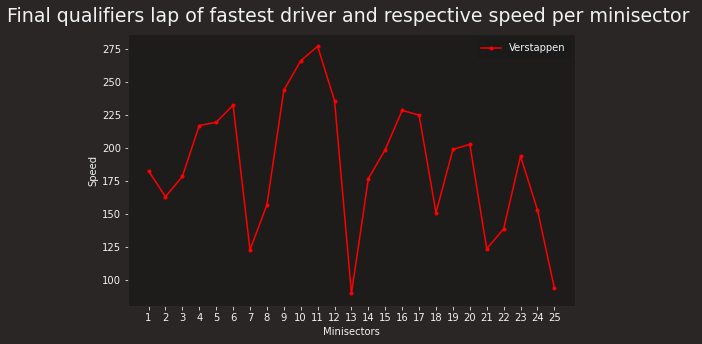

In [51]:
plt.figure(figsize=(8,5))
plt.title('Final qualifiers lap of fastest driver and respective speed per minisector ')
plt.plot(Q_fin.Minisector,Q_fin.F_Speed,'r.-', label = 'Verstappen')
plt.xticks(Q_fin.Minisector)
plt.xlabel('Minisectors')
plt.ylabel('Speed')
plt.legend()
plt.show()

In [52]:
#For further analysis lets find Max Verstappen and Lewis Hamilton's fastest laps

In [53]:
Ham_lap = F1laps[F1laps['Driver'] == 'HAM']

In [54]:
#Top 5 fastest laps of Hamilton
Ham_lap = Ham_lap.sort_values(by ='LapTime', ascending = True)
Ham_lap[['LapTime','LapNumber','Driver']].head()

,LapTime,LapNumber,Driver
16,0 days 00:01:22.480000,17,HAM
13,0 days 00:01:22.660000,14,HAM
4,0 days 00:01:22.845000,5,HAM
10,0 days 00:01:23.145000,11,HAM
7,0 days 00:01:23.185000,8,HAM


In [55]:
#Top 5 fastest laps of Max
Ver_lap = F1laps[F1laps['Driver'] == 'VER']
Ver_lap = Ver_lap.sort_values(by ='LapTime', ascending = True)
Ver_lap[['LapTime','LapNumber','Driver']].head()

,LapTime,LapNumber,Driver
33,0 days 00:01:22.109000,15,VER
30,0 days 00:01:22.800000,12,VER
26,0 days 00:01:23.189000,8,VER
23,0 days 00:01:23.322000,5,VER
36,0 days 00:01:23.541000,18,VER


In [56]:
#From the above result the following points can be noted
# Hamilton was fastest in 17th lap & Verstappen in 15th

In [57]:
#Ploting data to find the fastest speed of both with respective fastest laps in each minisector

In [58]:
#preparing the data for plotting
#Hamilton's fastest lap with minisectors
Ham_fastestlap = telemetry_c[telemetry_c['Lap'] == 17].reset_index()
Ham_fastestlap =Ham_fastestlap.groupby(['Minisector','Fastest_driver','Lap'])['F_Speed'].mean().reset_index()
Ham_fastestlap

,Minisector,Fastest_driver,Lap,F_Speed
0,1,HAM,17,260.615385
1,2,HAM,17,229.333333
2,3,HAM,17,223.689655
3,4,HAM,17,265.541667
4,5,HAM,17,279.583333
...,...,...,...,...
20,21,HAM,17,152.441860
21,22,HAM,17,165.325000
22,23,HAM,17,243.777778
23,24,VER,17,221.896552


In [59]:
#Max Verstappen's fastest lap with minisectors
Ver_fastestlap = telemetry_c[telemetry_c['Lap'] == 15].reset_index()
Ver_fastestlap =Ver_fastestlap.groupby(['Minisector','Fastest_driver','Lap'])['F_Speed'].mean().reset_index()
Ver_fastestlap

,Minisector,Fastest_driver,Lap,F_Speed
0,1,VER,15,261.892857
1,2,VER,15,233.222222
2,3,VER,15,216.766667
3,4,VER,15,265.080000
4,5,VER,15,280.560000
...,...,...,...,...
20,21,VER,15,147.681818
21,22,VER,15,170.794872
22,23,VER,15,247.346154
23,24,VER,15,210.218750


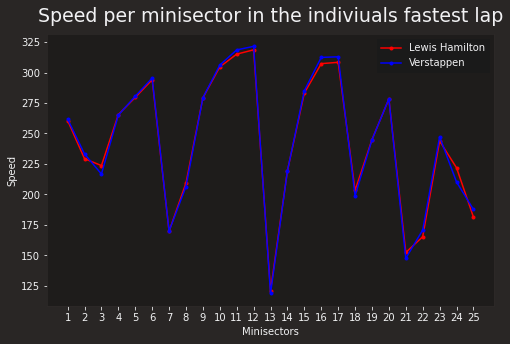

In [60]:
#Plot
plt.figure(figsize=(8,5))
plt.title('Speed per minisector in the indiviuals fastest lap')
plt.plot(Ham_fastestlap.Minisector,Ham_fastestlap.F_Speed,'r.-', label = 'Lewis Hamilton')
plt.plot(Ver_fastestlap.Minisector,Ver_fastestlap.F_Speed,'b.-', label = 'Verstappen')
plt.xticks(Ver_fastestlap.Minisector)
plt.xlabel('Minisectors')
plt.ylabel('Speed')
plt.legend()
plt.show()


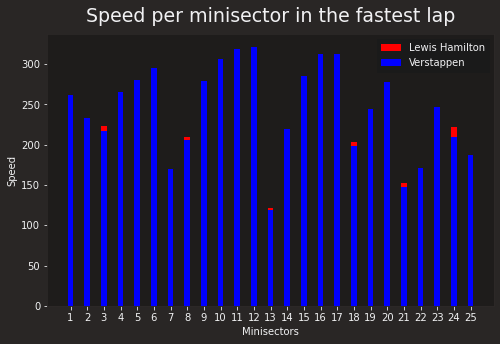

In [61]:
#Visualization using bar graph
plt.figure(figsize=(8,5))
plt.title('Speed per minisector in the fastest lap')
width = 0.35
plt.bar(Ham_fastestlap.Minisector,Ham_fastestlap.F_Speed,width, color='r',label = 'Lewis Hamilton')
plt.bar(Ver_fastestlap.Minisector,Ver_fastestlap.F_Speed,width, color='b', label = 'Verstappen')
plt.xticks(Ver_fastestlap.Minisector)
plt.xlabel('Minisectors')
plt.ylabel('Speed')
plt.legend()
plt.show()

#Thank You :)